In [1]:
using Distributions
using StatsPlots
default(fmt=:png)
using Printf

Model:

$$
\begin{alignedat}{2}
&
Z_1 \sim \operatorname{Normal}(0, 1), & &
\\ &
Z_2 \sim \operatorname{Normal}(0, 1),
\\ &
Z_3 = Z_1 + Z_2 + \varepsilon_1, & & \quad \varepsilon_1 \sim \operatorname{Normal}(0, e),
\\ &
X = Z_1 + Z_3 + \varepsilon_2, & & \quad \varepsilon_2 \sim \operatorname{Normal}(0, e),
\\ &
W = X + \varepsilon_3, & & \quad \varepsilon_3 \sim \operatorname{Normal}(0, e),
\\ &
Y = W + Z_2 + Z_3 + \varepsilon_4, & & \quad \varepsilon_4 \sim \operatorname{Normal}(0, e) \qquad (e = 0.2)
\end{alignedat}
$$

In [2]:
function rand_fig2_9(; e=0.2)
    z1 = randn()
    z2 = randn()
    z3 = z1 + z2 + e*randn()
    x = z1 + z3 + e*randn()
    w = x + e*randn()
    y = w + z2 + z3 + e*randn()
    [w, x, y, z1, z2, z3]
end

function rand_fig2_9(n; e=0.2)
    [rand_fig2_9(; e) for _ in 1:n] |> stack
end

rand_fig2_9 (generic function with 2 methods)

In [3]:
N = 10^4
data = rand_fig2_9(N)

6×10000 Matrix{Float64}:
  0.840494  5.54867   1.58344    0.197426  …  -1.61998   -0.669327  1.12018
  0.355504  5.08226   1.61685    0.380166     -1.41516   -0.43314   0.944299
  0.729017  9.38262   3.43408   -0.982763     -1.23576   -1.66857   2.93774
  0.179894  1.9776    0.596125   0.481874     -1.17003    0.13081   0.0516791
 -0.470935  0.774308  0.378902  -0.801799      0.695472  -0.449471  1.03311
 -0.081635  2.99624   1.01816   -0.329526  …  -0.207379  -0.542181  0.83005

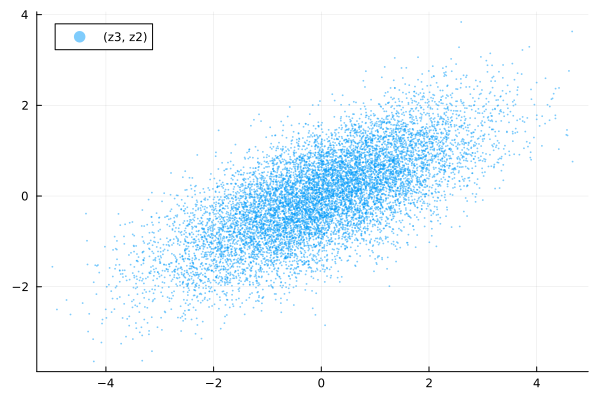

In [4]:
scatter(data[6,:], data[5,:]; ms=1, msc=:auto, ma=0.5, label="(z3, z2)")

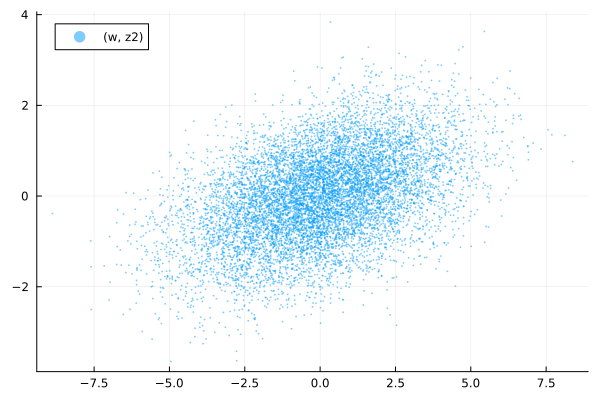

In [5]:
scatter(data[1,:], data[5,:]; ms=1, msc=:auto, ma=0.5, label="(w, z2)")

[ Info: Saved animation to D:\OneDrive\public\0040\w_and_z2_give_z3.gif


Plots.AnimatedGif("D:\\OneDrive\\public\\0040\\w_and_z2_give_z3.gif")
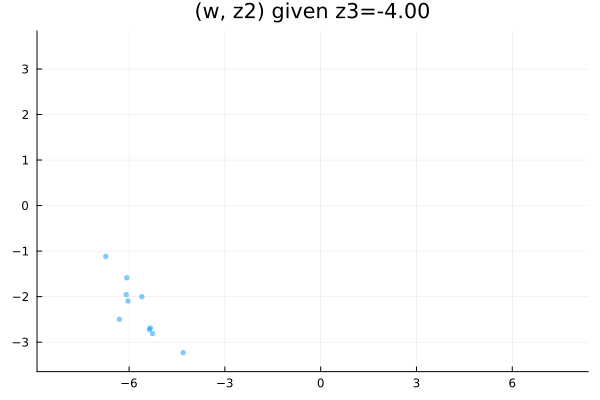

In [6]:
anim = @animate for z3 in -4:0.2:4
    ks = @.(abs(data[6,:] - z3) < 0.1)
    scatter(data[1,ks], data[5,ks]; ms=3, msc=:auto, ma=0.5, label="")
    plot!(xlim=extrema(data[1,:]), ylim=extrema(data[5,:]))
    title!("(w, z2) given z3=$(@sprintf("%5.2f", z3))")
end
gif(anim, "w_and_z2_give_z3.gif")

In [7]:
n = N
W, X, Y, Z1, Z2, Z3 = (r[1:n] for r in eachrow(data))

A = [ones(n) Z3]
@show a = A \ Z2

B = [ones(n) Z3 W]
@show b = B \ Z2

C = [ones(n) Z3 X]
@show c = C \ Z2

D = [ones(n) Z3 Z1]
@show d = D \ Z2;

a = A \ Z2 = [-0.008033590220649818, 0.4860312982740487]
b = B \ Z2 = [-0.0034112126622283714, 1.7217097531942789, -0.8281680932236778]
c = C \ Z2 = [-0.0034505826031396786, 1.8176705795638337, -0.8917365962277161]
d = D \ Z2 = [-0.0028426500264547463, 0.9615766094165662, -0.9632520036158099]


In [8]:
n = 100
W, X, Y, Z1, Z2, Z3 = (r[1:n] for r in eachrow(data))

A = [ones(n) Z3]
@show a = A \ Z2

B = [ones(n) Z3 W]
@show b = B \ Z2

C = [ones(n) Z3 X]
@show c = C \ Z2

D = [ones(n) Z3 Z1]
@show d = D \ Z2;

a = A \ Z2 = [-0.0028690501071947606, 0.4739937556218141]
b = B \ Z2 = [0.0034608908016845, 1.7280704848980666, -0.8273139932676191]
c = C \ Z2 = [0.012104194870164916, 1.863612939337838, -0.9181314688483551]
d = D \ Z2 = [-0.008750150347681205, 0.9756982167142648, -0.988537836240264]


std(res_a) = 0.707315518978153
std(res_b) = 0.3203057361061037
std(res_c) = 0.27107888016299364
std(res_d) = 0.19785012604912677


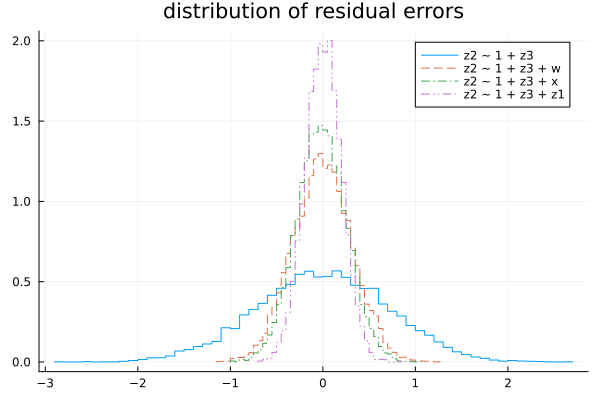

In [9]:
res_a = [z2 - (a[1] + a[2]*z3)          for (w,x,y,z1,z2,z3) in eachcol(data)]
res_b = [z2 - (b[1] + b[2]*z3 + b[3]*w) for (w,x,y,z1,z2,z3) in eachcol(data)]
res_c = [z2 - (c[1] + c[2]*z3 + c[3]*x) for (w,x,y,z1,z2,z3) in eachcol(data)]
res_d = [z2 - (d[1] + d[2]*z3 + d[3]*z1) for (w,x,y,z1,z2,z3) in eachcol(data)]
@show std(res_a)
@show std(res_b)
@show std(res_c)
@show std(res_d)
stephist(res_a; label="z2 ~ 1 + z3", norm=true)
stephist!(res_b; label="z2 ~ 1 + z3 + w", norm=true, ls=:dash)
stephist!(res_c; label="z2 ~ 1 + z3 + x", norm=true, ls=:dashdot)
stephist!(res_d; label="z2 ~ 1 + z3 + z1", norm=true, ls=:dashdotdot)
title!("distribution of residual errors")

このように, 上で定義したモデル

$$
\begin{alignedat}{2}
&
Z_1 \sim \operatorname{Normal}(0, 1), & &
\\ &
Z_2 \sim \operatorname{Normal}(0, 1),
\\ &
Z_3 = Z_1 + Z_2 + \varepsilon_1, & & \quad \varepsilon_1 \sim \operatorname{Normal}(0, e),
\\ &
X = Z_1 + Z_3 + \varepsilon_2, & & \quad \varepsilon_2 \sim \operatorname{Normal}(0, e),
\\ &
W = X + \varepsilon_3, & & \quad \varepsilon_3 \sim \operatorname{Normal}(0, e),
\\ &
Y = W + Z_2 + Z_3 + \varepsilon_4, & & \quad \varepsilon_4 \sim \operatorname{Normal}(0, e) \qquad (e = 0.2)
\end{alignedat}
$$

によって生成されたデータについて, $Z_2$ の値を $Z_3$ の値から線形回帰で予測するとき, 説明変数(独立変数)に $W$, $X$, $Z_1$ の中の1つを追加すると予測誤差が順次小さくなる.

上のモデルは次のように描ける:

$$
\begin{matrix}
Z_1        &          &     &          & Z_2 \\
\downarrow & \searrow &     & \swarrow & \downarrow \\
\downarrow &          & Z_3 &          & \downarrow \\
\downarrow & \swarrow &     & \searrow & \downarrow \\
X          & \to      & W   & \to      & Y   \\
\end{matrix}
$$

$Z_3$ で条件付けると, $Z_2$ と $W$ のあいだの以下のパスは閉じられる:

$$
\begin{matrix}
           &          &       &          & Z_2 \\
           &          &       & \swarrow &            \\
           &          & (Z_3) &          &            \\
           & \swarrow &       &          &            \\
X          & \to      & W     &          & \\
\end{matrix}
$$

しかし, $Z_3$ で条件付けると, $Z_2$ と $W$ のあいだの以下のパスは開かれる:

$$
\begin{matrix}
Z_1        &          &       &          & Z_2 \\
\downarrow & \searrow &       & \swarrow &            \\
\downarrow &          & (Z_3) &          &            \\
\downarrow &          &       &          &            \\
X          & \to      & W     &          & \\
\end{matrix}
$$

ゆえに $Z_3$ で条件付けると, $Z_2$ と $W$ は独立ではなくなる.

上の数値例では, $Z_2$ を説明変数として使う回帰において($Z_2$ で条件付けるとき),  $W$ も説明変数(独立変数)に追加すると予測精度が向上している. 

さらに予測精度の向上は $W$ よりも $X$ を追加した場合の方が大きく, さらに $Z_1$ を追加した場合の方が大きいことも確認されている.